<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Linear-Models/blob/master/Bhav_copy__assignment_linear_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')


In [17]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [19]:
df.shape

(48818, 34)

In [20]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [21]:
df.isnull().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [23]:
#descriptive statistics for rent 
df['price'].describe()

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

In [0]:
#Let us exclude non-numeric columns from dataset
df2 = df.select_dtypes(include='number')

In [31]:
df2.head()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,40.7145,-73.9425,3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,40.7947,-73.9667,5465,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,40.7388,-74.0018,2850,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,3275,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,40.8241,-73.9493,3350,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df2.isnull().sum()

bathrooms               0
bedrooms                0
latitude                0
longitude               0
price                   0
elevator                0
cats_allowed            0
hardwood_floors         0
dogs_allowed            0
doorman                 0
dishwasher              0
no_fee                  0
laundry_in_building     0
fitness_center          0
pre-war                 0
laundry_in_unit         0
roof_deck               0
outdoor_space           0
dining_room             0
high_speed_internet     0
balcony                 0
swimming_pool           0
new_construction        0
terrace                 0
exclusive               0
loft                    0
garden_patio            0
wheelchair_access       0
common_outdoor_space    0
dtype: int64

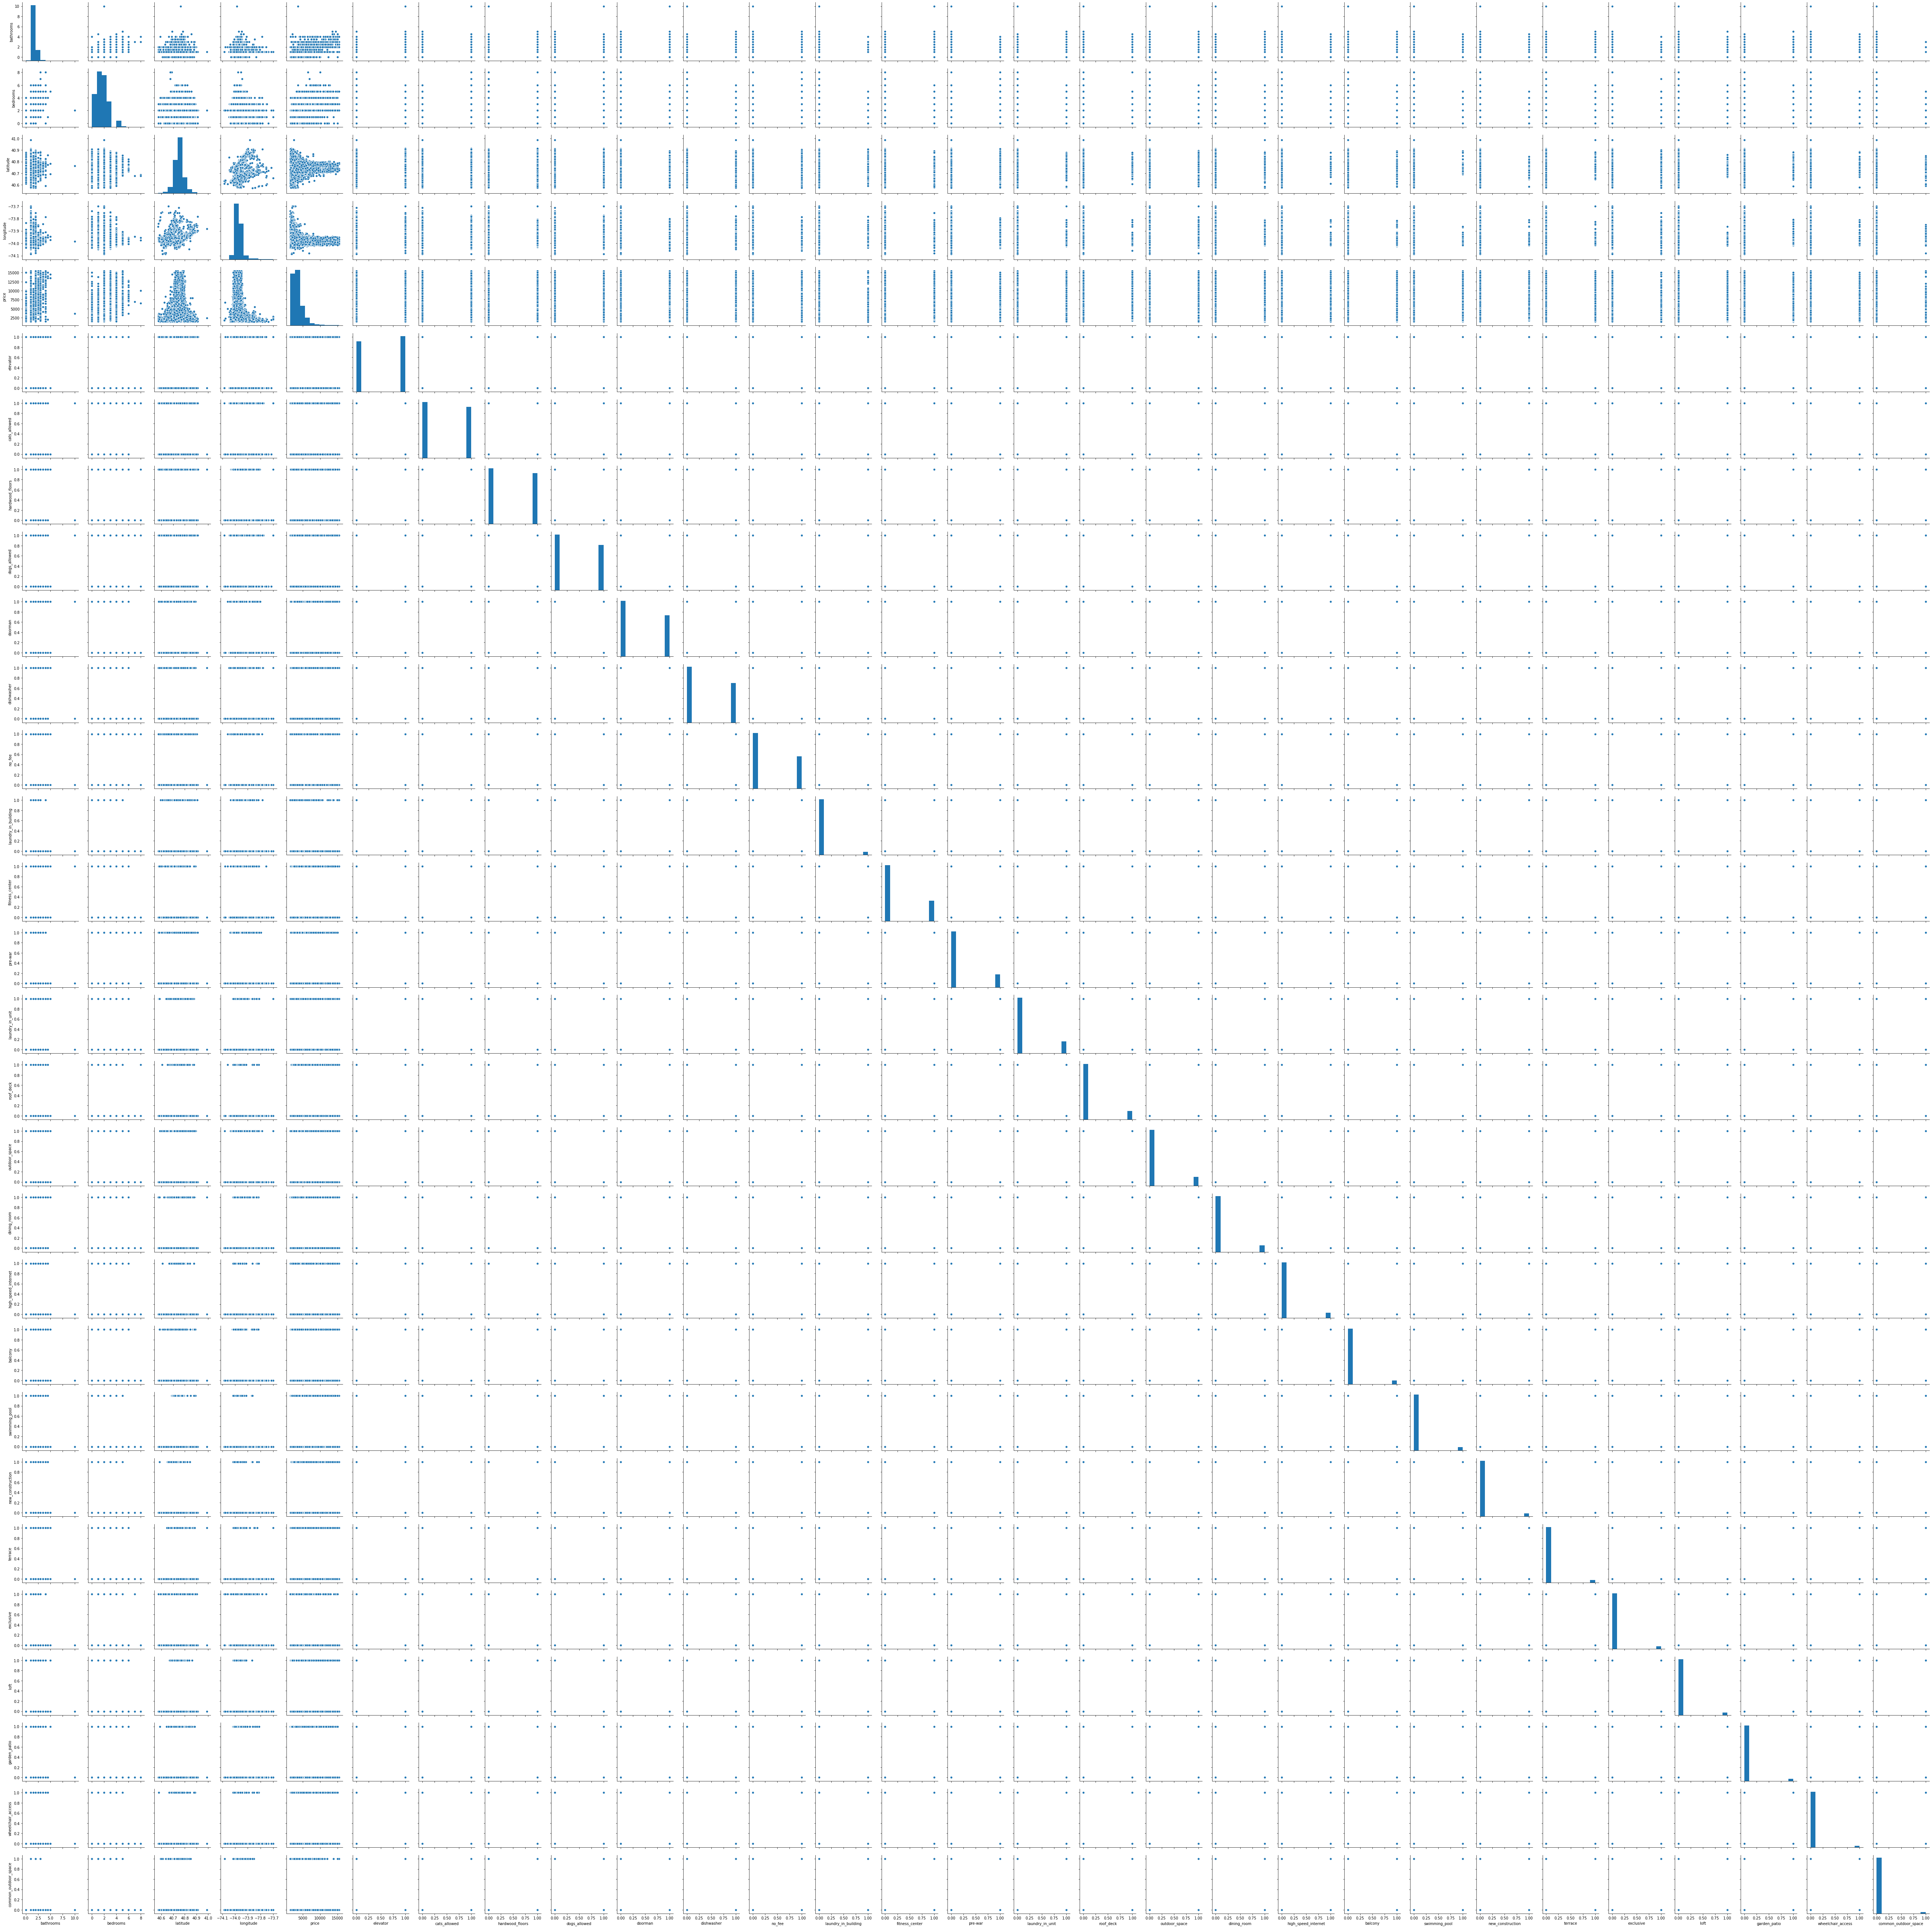

In [32]:
#Explore relationships among numeric variables using seaborn pairplot
import seaborn as sns
sns.pairplot(df2)
#From the output below there appears to some relationship between rent and longitude as well as latitude.

In [0]:
#Let us explore the relationship between rent and latitude/longitude.
#The dataset is from NYC and so location as determined by longitude and latitude is very important in determining rent.
#Latitude may be important in NYC since higher latitude may mean location in areas like Harlem which have lower rent.
#Longitude also may be important since locations closer to the east or west borders of NYC may have higher rent due to waterfront proximity.


In [0]:
#The best relationship appears to be an relationship between rent and longitude from the above seaborn data exploration pairplot output

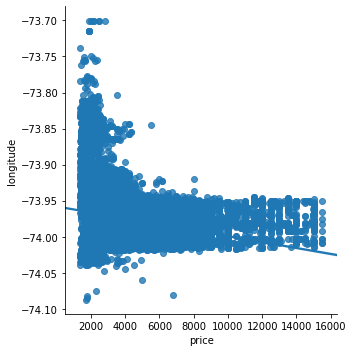

In [46]:
sns.lmplot(data=df2, x="price", y="longitude")


In [0]:
#More longitude (more west) in the scatterplot above actually has higher rent. We need to convert negative longitude numbers to positive in dataframe.
#Longitude numbers are negative here because they are to west of the Prime Meridian passing through Greenwich, UK. 

In [84]:
#isolate price and longitude columns
df3 = df2[["price","longitude"]]
df3.head()

,price,longitude
0,3000,-73.9425
1,5465,-73.9667
2,2850,-74.0018
3,3275,-73.9677
4,3350,-73.9493


In [86]:
#convert longitude to positive values
df4= df3.abs()
df4.head()

,price,longitude
0,3000.0,73.9425
1,5465.0,73.9667
2,2850.0,74.0018
3,3275.0,73.9677
4,3350.0,73.9493


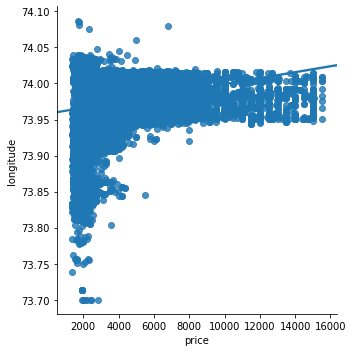

In [87]:
#plot relationship between price and longitude
sns.lmplot(data=df4, x="price", y="longitude")

In [0]:
#The output now shows a linear positive relationship between rent and longitude. More longitude (more west) = Higher rent.

In [88]:
df4['longitude'].describe()

count    48818.000000
mean        73.972758
std          0.028887
min         73.700100
25%         73.955000
50%         73.978000
75%         73.991800
max         74.087300
Name: longitude, dtype: float64

Five-step process for linear regression using Scikit-learn.

In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [0]:
# 2. Instantiate this class
lm = LinearRegression()

In [91]:
# 3. Arrange X features matrix & y target vector
features = ['longitude']
target = 'price'
X = df4[features]
y = df4[target]

print(X.shape, y.shape)

(48818, 1) (48818,)


In [92]:
# 4. Fit the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# 5. Apply the model to new data
#Test 1:
longitude = 74 
#We can only input values between 73.70 and 74.087 longitude (min-max from above dataset).
X_test = [[longitude]]
y_pred = model.predict(X_test)

print(f'Predicted price for {longitude} longitude location NYC apartment: {y_pred[0]}')

Predicted price for 74 longitude location NYC condo: 3996.779272040585


In [96]:
#Apply the model to new data
#Test 2:
longitude = 73.95 
#We can only input values between 73.70 and 74.087 longitude (min-max from above dataset).
X_test = [[longitude]]
y_pred = model.predict(X_test)

print(f'Predicted price for {longitude} longitude location NYC apartment: {y_pred[0]}')

Predicted price for 73.95 longitude location NYC apartment: 3231.02347855852


In [0]:
#The rent decreases on decreasing latitude (more east) when we test the model, so there is a positive linear relationship proven from testing the model.

Function to predict rent

In [0]:
def predict(longitude):
    y_pred = model.predict([[longitude]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    result = f'${estimate:,.0f} estimated rent for {longitude:,.010f} longitude location apartment in NYC. '
    explanation = f'In this linear regression, each additional longitude adds ${coefficient:,.01f}.'
    return result + explanation

In [117]:
predict(73.99)

'$3,844 estimated rent for 73.9900000000 longitude location apartment in NYC. In this linear regression, each additional longitude adds $15,315.1.'